In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import json

In [4]:
preprocessed_text_path = './dataset/preprocessed_text.csv'
data = pd.read_csv(preprocessed_text_path)
data.head()

,text,label
0,मेट्रो लाइन चलने दक्षिणी दिल्ली नोएडा काफी जाए...,india
1,नेटिजन यानि इंटरनेट सक्रिय नागरिक ट्विटर सरकार...,pakistan
2,फ़्लाइट एटेनडेंट मदद गुहार डिक चेनी निर्देश ज़...,news
3,प्रतीक खुलेपन आज़ाद ख्याली भीड़ अलग का.सवा साल...,india
4,ख़ासकर पिछले साल प्रधानमंत्री मनमोहन सिंह सुनन...,india


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import joblib

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)
model_save_path = './models/TCNB_model.pkl'
joblib.dump(model, model_save_path)
model_save_path

'./models/TCNB_model.pkl'

In [6]:
model = joblib.load(model_save_path)
y_pred = model.predict(X_test)
y_pred

array(['india', 'india', 'india', 'india', 'india', 'india', 'india',
       'india', 'india', 'india', 'india', 'india', 'india', 'india',
       'international', 'india', 'international', 'india', 'india',
       'india', 'india', 'india', 'india', 'india', 'india', 'india',
       'india', 'india', 'india', 'india', 'india', 'india', 'india',
       'international', 'india', 'india', 'india', 'india', 'india',
       'international', 'india', 'india', 'india', 'india', 'india',
       'india', 'international', 'india', 'india', 'india', 'india',
       'india', 'india', 'india', 'india', 'india', 'india',
       'international', 'india', 'india', 'india', 'india', 'india',
       'india', 'india', 'india', 'india', 'international', 'india',
       'india', 'india', 'india', 'india', 'india', 'india', 'india',
       'india', 'india', 'india', 'india', 'india', 'india', 'india',
       'international', 'india', 'india', 'india', 'india', 'india',
       'india', 'india', 'india', 'in

In [7]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.47


                 precision    recall  f1-score   support

       business       0.00      0.00      0.00        14
          china       0.00      0.00      0.00         6
  entertainment       0.00      0.00      0.00        63
          india       0.44      1.00      0.61       272
  institutional       0.00      0.00      0.00         6
  international       0.68      0.29      0.40       182
learningenglish       0.00      0.00      0.00         1
     multimedia       0.00      0.00      0.00         4
           news       0.00      0.00      0.00        45
       pakistan       0.00      0.00      0.00        10
        science       0.00      0.00      0.00        37
         social       0.00      0.00      0.00         4
      southasia       0.00      0.00      0.00        10
          sport       1.00      0.05      0.10        40

       accuracy                           0.47       694
      macro avg       0.15      0.10      0.08       694
   weighted avg       0.41   

/Users/pranavdeepak/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pranavdeepak/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pranavdeepak/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


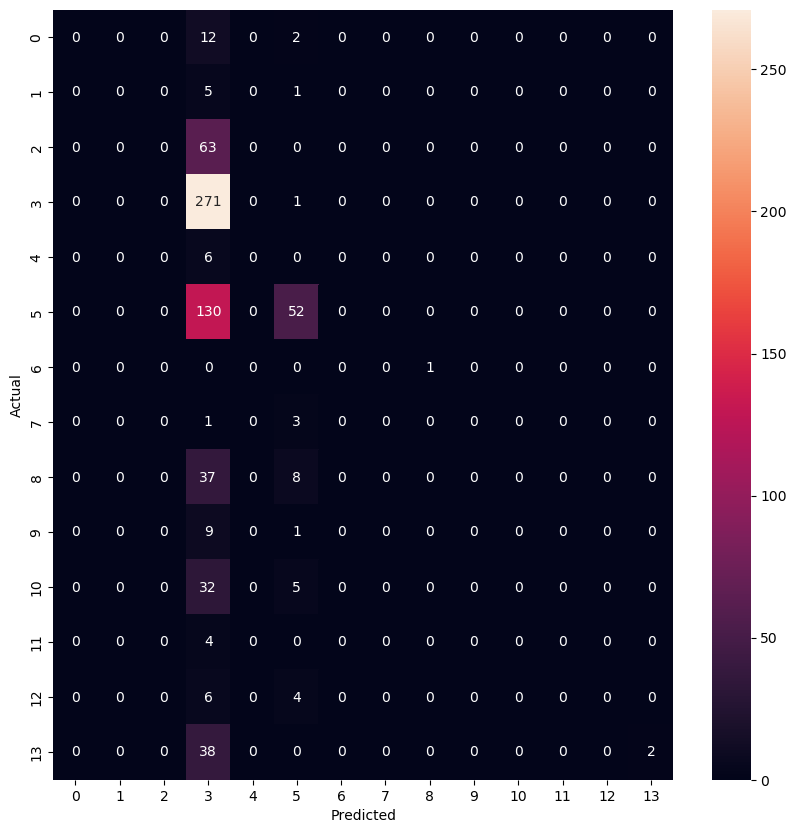

In [8]:
# Evaluate the model using the classification report.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Evaluate the model using the confusion matrix.
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/Users/pranavdeepak/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pranavdeepak/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pranavdeepak/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


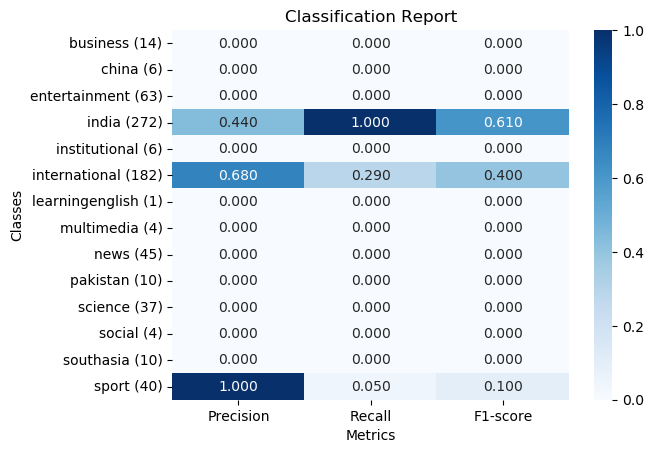

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_recall_fscore_support

def plot_classification_report(classification_report):
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2: (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) == 0:
            break
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)

    plotMat = np.array(plotMat)
    xticks = ['Precision', 'Recall', 'F1-score']
    yticks = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup in enumerate(support)]

    fig, ax = plt.subplots()
    sns.heatmap(plotMat, annot=True, fmt=".3f", cmap="Blues", xticklabels=xticks, yticklabels=yticks, ax=ax)
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.title('Classification Report')

    plt.show()

# Example usage:
report = classification_report(y_test, y_pred)
plot_classification_report(report)



In [ ]:
# Load the Model
model = joblib.load(model_save_path)
pred = model.predict(['प्रधानमंत्री हिशाम कांदिल मुताबिक गज़ा हालात उन्हें देखकर चुप नहीं .प्रधानमंत्री हिशाम कांदिल यात्रा तीन घंटे इसराइल बमबारी रज़ामंद इसराइली अधिकारियों कहना फलस्तीनी चरमपंछियों रॉकेट हमले जारी हैं.गुरुवार रात इसराइल ग़ज़ा ठिकानों हवाई हमलों निशाना बनाया ग़ज़ा इसराइली क्षेत्र रॉकेट दागे गए.हिशाम कांदिल पक्षों संघर्षविराम कोशिश गाज़ा पहुंचे हैं.बुधवार इसराइल हवाई हमलों हमास सैन्य शाखा प्रमुख मौत पक्षों तनाव एकदम बढ़ है.पिछले घंटों ग़ज़ा इसराइली हमलों बच्चों समेत फलस्तीनी मारे दक्षिणी इसराइल हमास रॉकेट हमलों तीन इसराइलियों जानें हैं.हमास उसने हाल दिनों ग़ज़ा रॉकेट दागे जिनमें इसराइल अनुसार मिसाइल रक्षा सिस्टम आयरन डॉम नाकाम दिया.दूसरी तरफ इसराइल हजार रिजर्व सैनिकों वाली सेना बुलाने मंजूरी हमास जमीनी कार्रवाई तैयारी तौर देखा हालांकि सरकार तरफ बारे संकेत नहीं मिले हैं.खबरों बताया इसराइली सैनिकों बसें सैन्य साजोसामान लदे ट्रक तटीय इलाके तरफ हैं.इसराइली टीवी चैनलों कहना तैयारियां दिखाती अतिक्रमण योजना तैयार हालांकि सैन्य अफसरों कहना फैसला नहीं है.वहीं ग़ज़ा हमास प्रधानमंत्री इस्माइल हानिए क्षेत्र इसराइल क्रूर हमले निंदा है.मिस्र राष्ट्रपति मोहम्मद मुर्सी ग़ज़ा इसराइल बमबारी आलोचना मुताबकि इससे क्षेत्र स्थिरता प्रभावित होगी.शुक्रवार मुद्दे मिस्र राजधानी काहिरा अरब लीग विदेश मंत्रियों बैठक है.इस अमरीका मिस्र तुर्की यूरोपीय देशों आग्रह हमास इसराइल हमले दबाव डालें'])
pred

array(['international'], dtype='<U15')

In [ ]:
# Write a function which will take text and return the predicted label.
def predict_category(text, model=model):
    pred = model.predict([text])
    return pred[0]

predict_category('प्रधानमंत्री हिशाम कांदिल मुताबिक गज़ा हालात उन्हें देखकर चुप नहीं .प्रधानमंत्री हिशाम कांदिल यात्रा तीन घंटे इसराइल बमबारी रज़ामंद इसराइली अधिकारियों कहना फलस्तीनी चरमपंछियों रॉकेट हमले जारी हैं.गुरुवार रात इसराइल ग़ज़ा ठिकानों हवाई हमलों निशाना बनाया ग़ज़ा इसराइली क्षेत्र रॉकेट दागे गए.हिशाम कांदिल पक्षों संघर्षविराम कोशिश गाज़ा पहुंचे हैं.बुधवार इसराइल हवाई हमलों हमास सैन्य शाखा प्रमुख मौत पक्षों तनाव एकदम बढ़ है.पिछले घंटों ग़ज़ा इसराइली हमलों बच्चों समेत फलस्तीनी मारे दक्षिणी इसराइल हमास रॉकेट हमलों तीन इसराइलियों जानें हैं.हमास उसने हाल दिनों ग़ज़ा रॉकेट दागे जिनमें इसराइल अनुसार मिसाइल रक्षा सिस्टम आयरन डॉम नाकाम दिया.दूसरी तरफ इसराइल हजार रिजर्व सैनिकों वाली सेना बुलाने मंजूरी हमास जमीनी कार्रवाई तैयारी तौर देखा हालांकि सरकार तरफ बारे संकेत नहीं मिले हैं.खबरों बताया इसराइली सैनिकों बसें सैन्य साजोसामान लदे ट्रक तटीय इलाके तरफ हैं.इसराइली टीवी चैनलों कहना तैयारियां दिखाती अतिक्रमण योजना तैयार हालांकि सैन्य अफसरों कहना फैसला नहीं है.वहीं ग़ज़ा हमास प्रधानमंत्री इस्माइल हानिए क्षेत्र इसराइल क्रूर हमले निंदा है.मिस्र राष्ट्रपति मोहम्मद मुर्सी ग़ज़ा इसराइल बमबारी आलोचना मुताबकि इससे क्षेत्र स्थिरता प्रभावित होगी.शुक्रवार मुद्दे मिस्र राजधानी काहिरा अरब लीग विदेश मंत्रियों बैठक है.इस अमरीका मिस्र तुर्की यूरोपीय देशों आग्रह हमास इसराइल हमले दबाव डालें')

'international'